# Desafío Data Science Latam

## Importa librerías

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Carga archivo de datos

In [3]:
latamDF = pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I','Fecha-O'])
latamDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

C:\Users\an2fe\anaconda3v2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Pregunta 1
### ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Los datos estan claramente diferenciados entre programados y operado, lo cual facilita determinar cuáles vuelos se retrasaron. En ambos casos (programado y operado), se incluye información en la fecha y hora, número de vuelo, ciudades de origen y destino, y código de la aerolinea.

Adicionalmente se incluye columnas individuales para el dia, mes, y año en que los vuelos fueron operados. Inicialmente esta información parece redundante con la columna "Fecha-O". Adicionalmente se incluye el día de la semana, el cuál puede ser relevante para predecir el retraso de un vuelo.

Una columna con el tipo de vuelo (Nacional o Internacional), la cuál también puede ser de importancia para la predicción.

Finalmente, se tienen tres columnas con los nombres completos de la aerolinea operadora, ciudad de origen y ciudad de destino. Esta información es redundante con las columnas "Ori-O", "Des-O", "Emp-O".  

A continuación se realizará una exploración de los datos para conocer más en detalle la distribución de los datos en el tiempo.

In [6]:
#Agrupa los vuelos por año
latamDF.groupby(latamDF['Fecha-O'].dt.year).count()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-O,,,,,,,,,,,,,,,,,,
2017,68204,68204,68204,68204,68204,68204,68203,68204,68204,68204,68204,68204,68204,68204,68204,68204,68204,68204
2018,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


La gran mayoría de los vuelos incluidos en el dataset son del 2017, por lo cual el año será irrelevante para el análisis

In [7]:
#Muestra los 2 vuelos del 2018
latamDF[latamDF['Fecha-O'].dt.year==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Los 2 vuelos operados en el 2018 fueron vuelos programados para el 31 de Diciembre del 2017 cercanos a la medianoche, y se retrasaron lo suficiente como para ser operados en el 2018.

In [20]:
#Agrupa y muestra los vuelos por por mes y día
latamDF.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-I,,,,,,,,,,,,,,,,,
2017-01-01,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
2017-01-02,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
2017-01-03,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
2017-01-04,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
2017-01-05,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
2017-12-28,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
2017-12-29,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220


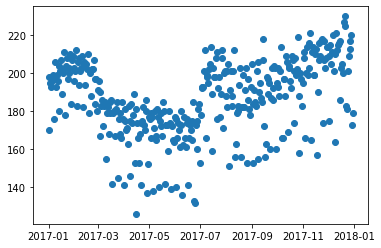

In [39]:
#Grafica la distribución de los vuelos por mes y día
countMD = latamDF.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
plt.scatter(countMD.index,countMD['Fecha-O'])

Se nota un claro decrecimiento en el número de vuelos entre marzo y julio.  Desde julio, los vuelos incrementan constantemente hasta el final del año (aparentemente de manera lineal).  Enero y febrero también muestran un grán número de vuelos.

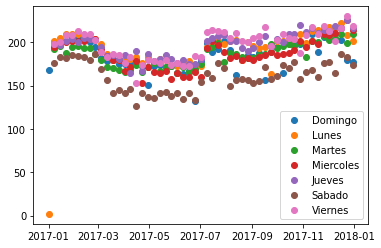

In [63]:
#Revisa la distribución por los días de la semana
#El ciclo for se utiliza para aislar los vuelos correspondientes a cada día de la semana
#Y añadir 7 scatter plots a la misma gráfica
weekD = latamDF.DIANOM.unique().tolist()
for x in weekD:
    latamDF_week = latamDF.loc[latamDF['DIANOM']==x]
    countMD = latamDF_week.groupby(pd.Grouper(key='Fecha-I',freq='W')).count()
    ax = plt.scatter(countMD.index,countMD['Fecha-O'],label=x)

plt.legend();
plt.show()

Se observa que los sabados tienen un menor número de vuelos de manera consistente, mientras los jueves y viernes tienden a ser los días con un mayor número de vuelos.

## Resumen pregunta 1
Todos los vuelos incluidos en el dataset son del 2017, por lo cual el año será irrelevante para el análisis.  Existen 2 vuelos que fueron operados en el 2018, los cuales fueron programados para el 31 de Diciembre del 2017 cercanos a la medianoche, y se retrasaron lo suficiente como para ser operados el primero de enero del 2018.

El número de vuelos entre marzo y julio es mucho menor que el resto del año.  Desde julio, los vuelos incrementan constantemente hasta el final del año (aparentemente de manera lineal).  Enero y febrero también muestran un grán número de vuelos.

Los sabados tienen un menor número de vuelos de manera consistente a través del año, mientras los jueves y viernes tienden a ser los días con un mayor número de vuelos.

# Pregunta 2
## Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 

In [181]:
#Temporada alta
#Defino función que realiza la diferenciación entre temporada alta y temporada baja
def temporada(row):  
    if ((row['Fecha-I'] > pd.Timestamp(2017, 12, 15) or row['Fecha-I'] < pd.Timestamp(2017, 3, 3)) 
        or (row['Fecha-I'] > pd.Timestamp(2017, 9, 11) and row['Fecha-I'] < pd.Timestamp(2017, 9, 30))
            or (row['Fecha-I'] > pd.Timestamp(2017, 7, 15) and row['Fecha-I'] < pd.Timestamp(2017, 7, 31))):
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe original
latamDF['temporada_alta']=latamDF.apply(lambda row: temporada(row),axis=1)


In [80]:
#dif_mim
#Calcula la diferencia entre las fechas y luego la convierte a minutos
latamDF['dif_min'] = (latamDF['Fecha-O'] - latamDF['Fecha-I'])
latamDF['dif_min'] = latamDF['dif_min']/np.timedelta64(1,'m')

In [82]:
#atraso_15
#Defino función que realiza la diferenciación entre atraso o no
def se_atraso(row):  
    if row['dif_min'] > 15:
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe
latamDF['atraso_15']=latamDF.apply(lambda row: se_atraso(row),axis=1)

In [104]:
#periodo_dia
#Defino función que realiza la diferenciación entre las horas del día
def periodo(row):  
    if row['Fecha-I'].hour >= 5  and (row['Fecha-I'].hour <= 11 and  row['Fecha-I'].minute <= 59):
        return 'mañana'
    elif row['Fecha-I'].hour >= 12 and (row['Fecha-I'].hour <= 18 and  row['Fecha-I'].minute <= 59):
        return 'tarde'
    else:
        return 'noche'

#Aplico la función a todo el dataframe
latamDF['periodo_dia']=latamDF.apply(lambda row: periodo(row),axis=1)   

In [183]:
#Exporta el dataframe a .csv
latamDF.to_csv('synthetic_features.csv')

# Pregunta 3
## ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [184]:
#Generaré dos dataframes, uno con los vuelos atrasados y otro con los vuelos a tiempo.  Esto permitirá 
#calcular las tasas de atraso respectiva
latamDFatrasado = latamDF.loc[latamDF['atraso_15']==1]
latamDFatiempo = latamDF.loc[latamDF['atraso_15']==0]

### Tasa de atraso por destino

In [161]:
#Tasa de atraso por destino

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por destino
destinoAtrasado = latamDFatrasado.groupby(['SIGLADES']).count().unstack(fill_value=0)['Fecha-I']
destinoAtiempo = latamDFatiempo.groupby(['SIGLADES']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por destino y las organiza de manera descendiente
destino_tasa_atraso = destinoAtrasado/(destinoAtrasado + destinoAtiempo)
destino_tasa_atraso = destino_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='SIGLADES'>

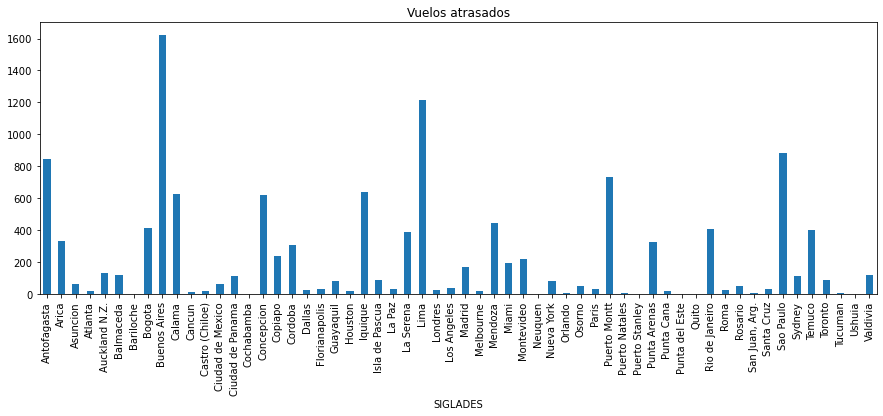

In [162]:
#Grafica los resultados
destinoAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='SIGLADES'>

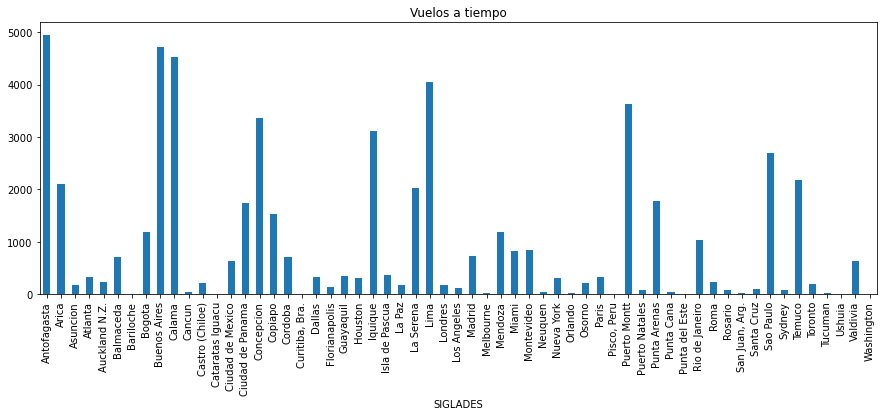

In [163]:
destinoAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por destino'}, xlabel='SIGLADES'>

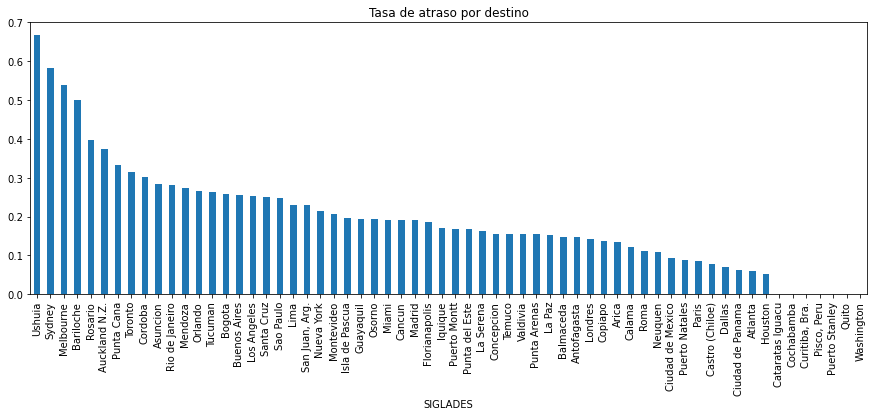

In [164]:
destino_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por destino')

Se observa que Ushuia tiene una tasa de retraso de casi 70%, seguido de Sydney, Melbourne, y Bariloche con tasas entre 50% y 60%.  Los destinos con menor tasa de retrasos son Ciudad de Panamá, Atlanta y Houston, con tasas menores al 10%.  

Los casos especiales de Cataratas de Iguacu, Cochabamba, Curitiba. Bra, Pisco Peru, Puerto Stanley, Quito, y Washington no muestran un dato válido. Este es debido a un número muy reducido de vuelos con todos siendo a tiempo o retrasados.

Cochabamba, Pisco Peru, Puerto Stanley, Quito todos los vuelos estuvieron retrasados.
Cataratas de Iguacu,  Curitiba. Bra, Washington todos los vuelos estuvieron a tiempo.

### Tasa de atraso por aerolinea

In [165]:
#Tasa de atraso por aerolinea

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por aerolinea
aerolineaAtrasado = latamDFatrasado.groupby(['OPERA']).count().unstack(fill_value=0)['Fecha-I']
aerolineaAtiempo = latamDFatiempo.groupby(['OPERA']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por aerolinea y las organiza de manera descendiente
aerolinea_tasa_atraso = aerolineaAtrasado/(aerolineaAtrasado + aerolineaAtiempo)
aerolinea_tasa_atraso = aerolinea_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='OPERA'>

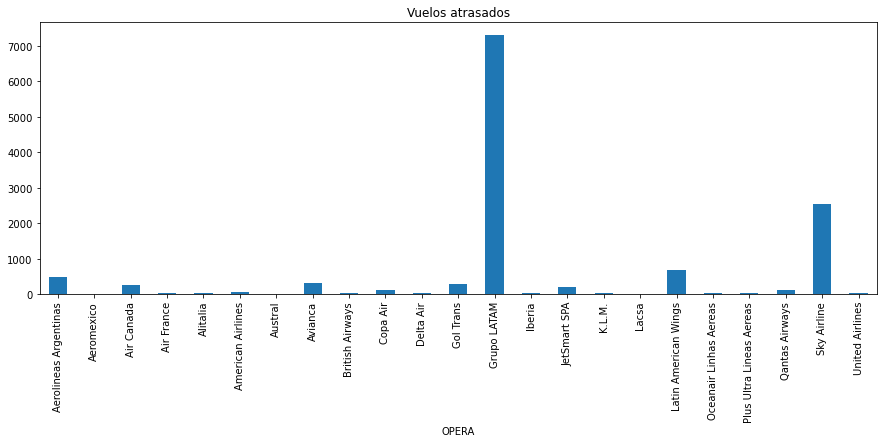

In [166]:
#Grafica los resultados
aerolineaAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='OPERA'>

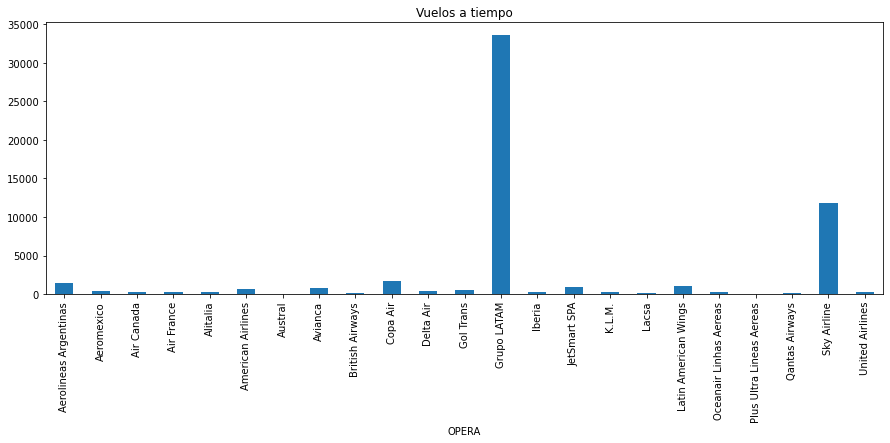

In [167]:
aerolineaAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por destino'}, xlabel='OPERA'>

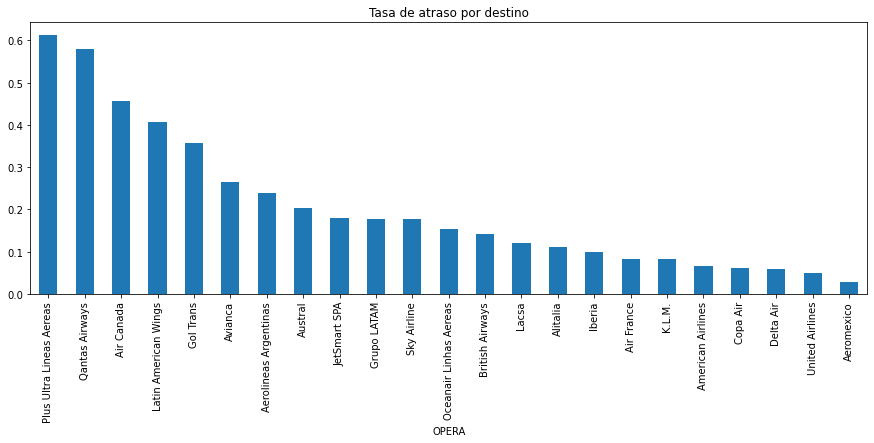

In [168]:
aerolinea_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por aerolinea')

Se observa que Plus Ultra Lineas Aereas tiene una tasa de retraso de más de 60%, seguido de Qantas Airways, Air Canada, y Latin American Wings con tasas entre 40% y 60%.  Las aerolineas con menor tasa de retrasos son Delta Air, United Airlines y Aeromexico, con tasas menores al 10%.  

### Tasa de atraso por mes

In [177]:
#Tasa de atraso por mes

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por mes
mesAtrasado = latamDFatrasado.groupby(['MES']).count().unstack(fill_value=0)['Fecha-I']
mesAtiempo = latamDFatiempo.groupby(['MES']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por mes y las organiza de manera descendiente
mes_tasa_atraso = mesAtrasado/(mesAtrasado + mesAtiempo)
mes_tasa_atraso = mes_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='MES'>

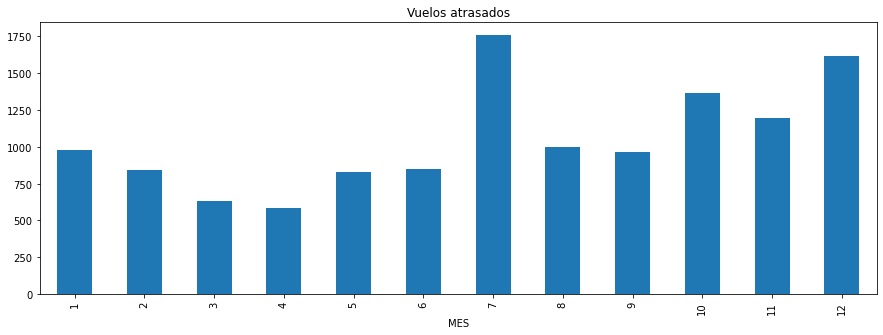

In [174]:
#Grafica los resultados
mesAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='MES'>

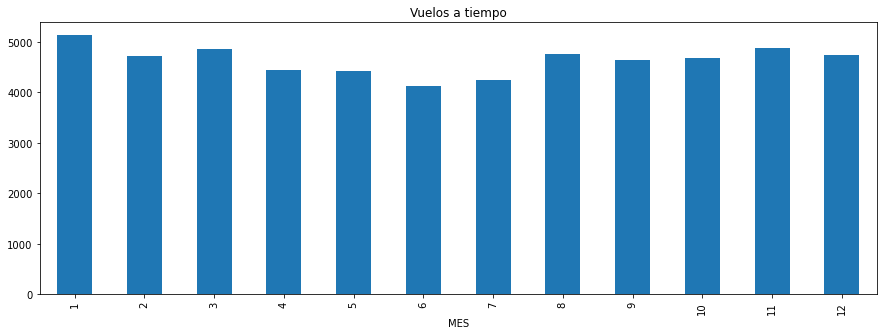

In [175]:
mesAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por destino'}, xlabel='MES'>

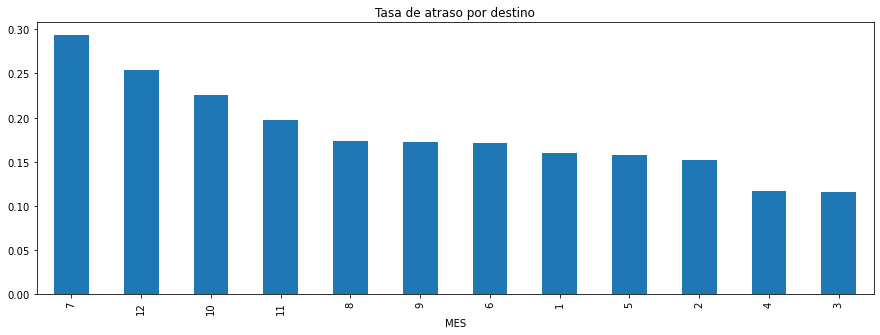

In [178]:
mes_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por mes')

Se observa que Julio y Diciembre tienen las mayores tasas de retraso, mientras marzo y abril tienen las menores.  Esto puede estar relacionada a periodos de temporada alta y temporada baja, respectivamente.

### Tasa de atraso por día de la semana

In [185]:
#Tasa de atraso por día de la semana

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por dia de la semana
dSemanaAtrasado = latamDFatrasado.groupby(['DIANOM']).count().unstack(fill_value=0)['Fecha-I']
dSemanaAtiempo = latamDFatiempo.groupby(['DIANOM']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por dia de la semana y las organiza de manera descendiente
dSemana_tasa_atraso = dSemanaAtrasado/(dSemanaAtrasado + dSemanaAtiempo)
dSemana_tasa_atraso = dSemana_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='DIANOM'>

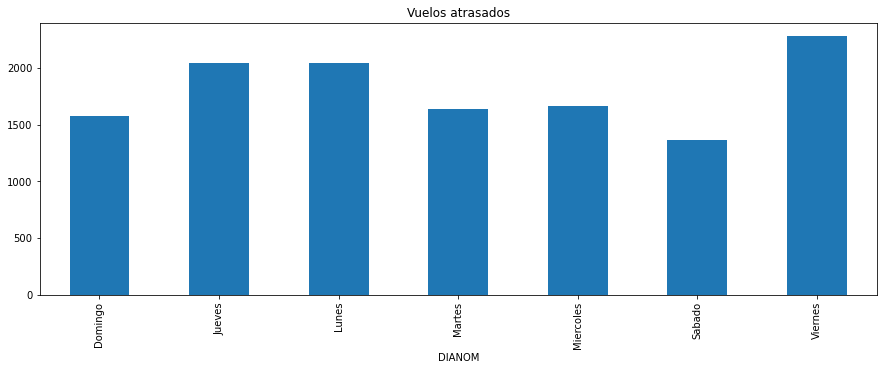

In [186]:
#Grafica los resultados
dSemanaAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='DIANOM'>

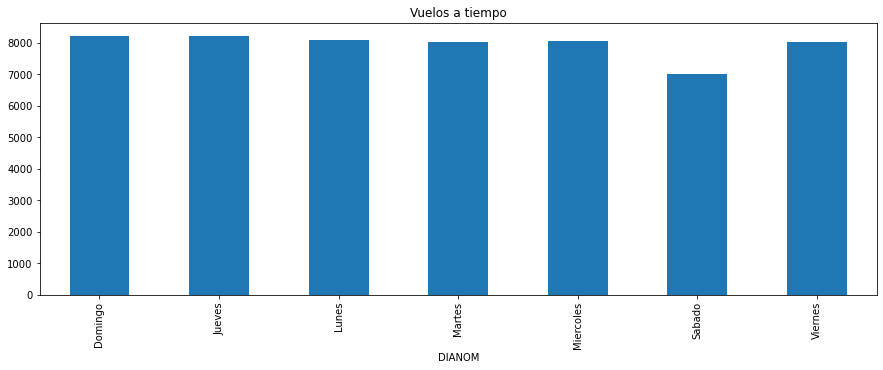

In [187]:
dSemanaAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por destino'}, xlabel='DIANOM'>

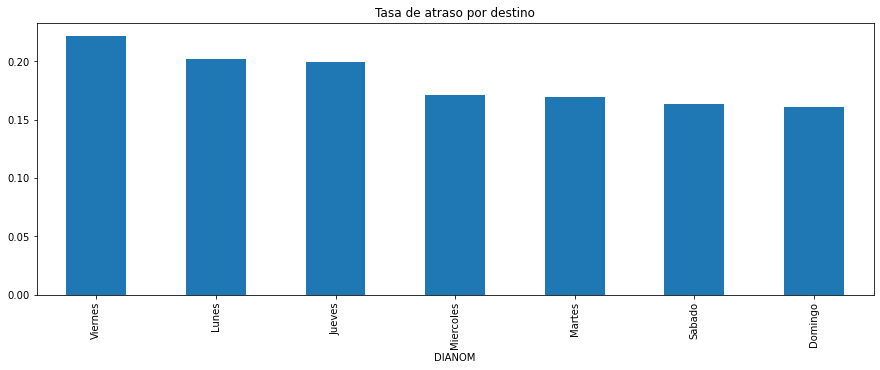

In [188]:
dSemana_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por dia de la semana')

Se observa que los viernes, lunes y jueves tienen las mayores tasas de retraso, y los sabados y domingos tienen las menores. Esto esta directamente relacionado con el número de vuelos en cada uno de estos días.

### Tasa de atraso por temporada

In [189]:
#Tasa de atraso por temporada

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por temporada
temporadaAtrasado = latamDFatrasado.groupby(['temporada_alta']).count().unstack(fill_value=0)['Fecha-I']
temporadaAtiempo = latamDFatiempo.groupby(['temporada_alta']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por temporada y las organiza de manera descendiente
temporada_tasa_atraso = temporadaAtrasado/(temporadaAtrasado + temporadaAtiempo)
temporada_tasa_atraso = temporada_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='temporada_alta'>

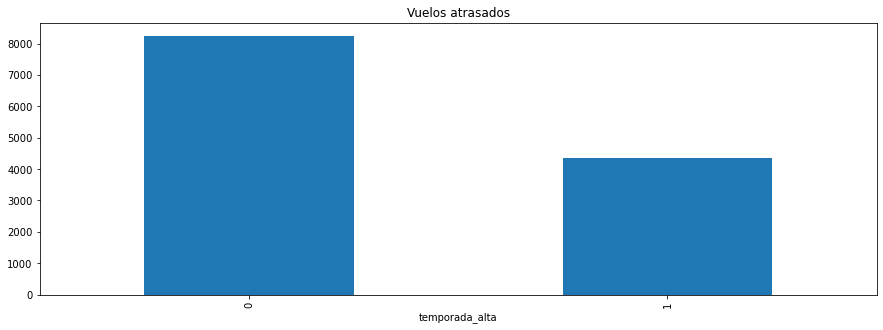

In [190]:
#Grafica los resultados
temporadaAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='temporada_alta'>

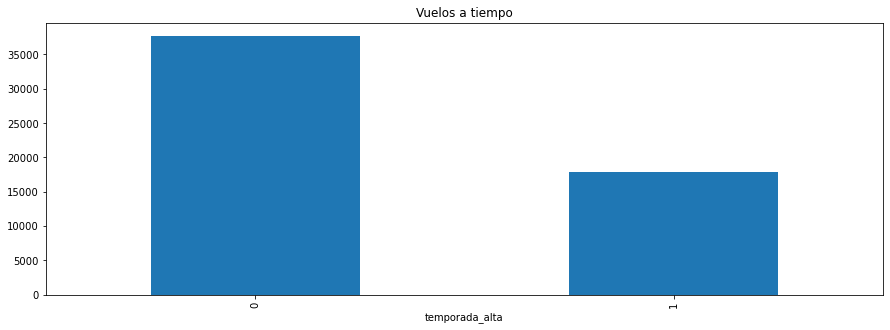

In [191]:
temporadaAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por destino'}, xlabel='temporada_alta'>

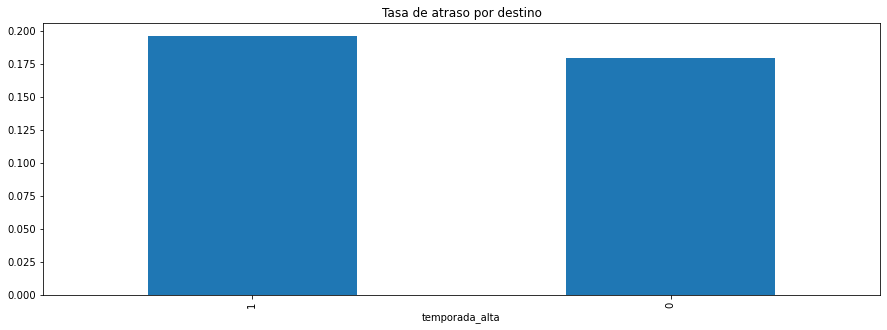

In [192]:
temporada_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por temporada')

Se observa que los vuelos en temporada alta tienen una tasa de retraso ligeramente mayor a los vuelos en temporada baja.

### Tasa de atraso por tipo de vuelo

In [197]:
#Tasa de atraso por tipo de vuelo

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por tipo de vuelo
tVueloAtrasado = latamDFatrasado.groupby(['TIPOVUELO']).count().unstack(fill_value=0)['Fecha-I']
tVueloAtiempo = latamDFatiempo.groupby(['TIPOVUELO']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por tipo de vuelo y las organiza de manera descendiente
tVuelo_tasa_atraso = tVueloAtrasado/(tVueloAtrasado + tVueloAtiempo)
tVuelo_tasa_atraso = tVuelo_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Vuelos atrasados'}, xlabel='TIPOVUELO'>

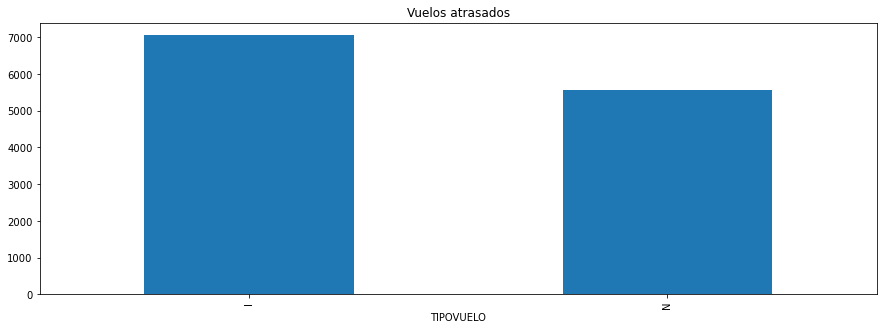

In [198]:
#Grafica los resultados
tVueloAtrasado.plot.bar(figsize=(15,5), title = 'Vuelos atrasados')

<AxesSubplot:title={'center':'Vuelos a tiempo'}, xlabel='TIPOVUELO'>

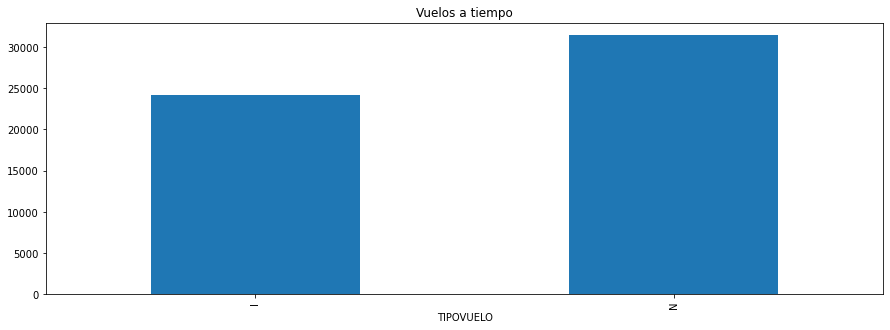

In [199]:
tVueloAtiempo.plot.bar(figsize=(15,5), title = 'Vuelos a tiempo')

<AxesSubplot:title={'center':'Tasa de atraso por tipo de vuelo'}, xlabel='TIPOVUELO'>

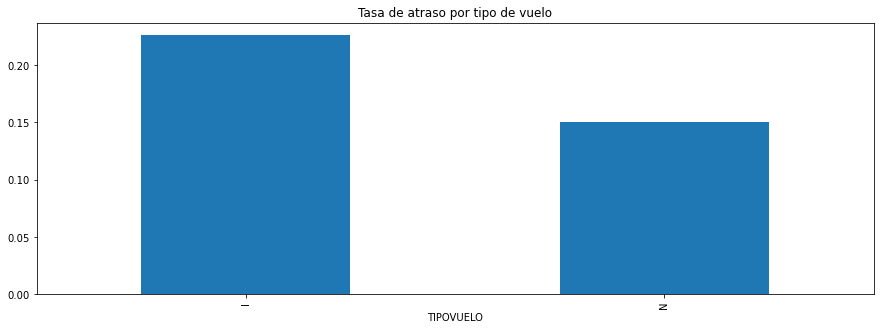

In [201]:
tVuelo_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por tipo de vuelo')

Se observa que los vuelos internacionles tiene casi una tasa de retraso casi 10% mayor que los vuelos nacionales.

### ¿Qué variables esperarías que más influyeran en predecir atrasos? 
El destino y la aerolinea son las variables que yo espero tengan mayor influencia en predecir los atrasos, seguidas de mes, día de la semana, y tipo de vuelo.  Temporada puede tener un efecto mínimo en la predicción.

# Pregunta 4
## Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

En primer lugar, se realizará el análisis de las tasas de retraso respecto a la hora de salida para saber si esta variable afecta los resultados.

In [202]:
#Tasa de atraso por periodo del día en que el vuelo salio

#Cuenta los vuelos atrasados y los vuelos a tiempo, agrupados por periodo de salida
hSalidaAtrasado = latamDFatrasado.groupby(['periodo_dia']).count().unstack(fill_value=0)['Fecha-I']
hSalidaAtiempo = latamDFatiempo.groupby(['periodo_dia']).count().unstack(fill_value=0)['Fecha-I']

#Calcula la tasa de atraso por periodo de salida y las organiza de manera descendiente
hSalida_tasa_atraso = hSalidaAtrasado/(hSalidaAtrasado + hSalidaAtiempo)
hSalida_tasa_atraso = hSalida_tasa_atraso.sort_values(ascending=False)

<AxesSubplot:title={'center':'Tasa de atraso por periodo del dia'}, xlabel='periodo_dia'>

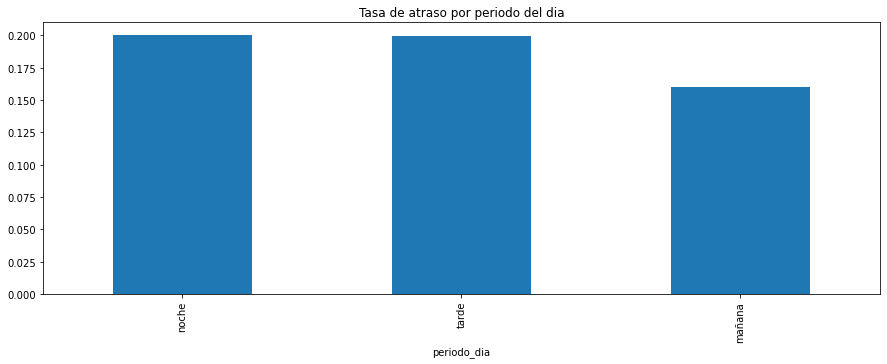

In [204]:
hSalida_tasa_atraso.plot.bar(figsize=(15,5), title = 'Tasa de atraso por periodo del dia')

Se observa que los vuelos en la mañana tiene una tasa de atraso menor a los vuelos de la tarde y de la noche.  Esto dos (noche y dia) no tiene gran diferencia en sus tasas de atraso.  Generaré una nueva columna que diferencia vuelos de la mañana con vuelos de la tarde/noche para tomar como variable de entrada para el modelo.

In [ ]:
#Genera la nueva columna periodo_mañana
#Defino función que realiza la diferenciación entre atraso o no
def se_atraso(row):  
    if row['periodo_dia'] == 'mañana':
        return 1
    else:
        return 0

#Aplico la función a todo el dataframe
latamDF['atraso_15']=latamDF.apply(lambda row: se_atraso(row),axis=1)